In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from contagion.SimplicialComplex import (SimplicialComplex,
                                         from_iacopini_cliques,
                                         from_random_sc_file,
                                         from_simplicial_csvs)
from contagion.utils import (get_iacopini_cliques,
                             get_random_simplicial_complexes,
                             get_simplicialbros_datasets)
from directories import sc_degrees_figures_dir
from plots import plot

%matplotlib inline

In [2]:
simplicialbros_datasets = get_simplicialbros_datasets()
random_simplicial_complexes = get_random_simplicial_complexes()
iacopini_simplicial_complexes = get_iacopini_cliques()

print('Avaliable simplicial complexes:\n')
print('  simplicialbros: ' + ','.join(simplicialbros_datasets))
print()
print('  rsc: ' + ','.join(random_simplicial_complexes))
print()
print('  iacopini: ' + ','.join(iacopini_simplicial_complexes))

Avaliable simplicial complexes:

  simplicialbros: coauth-DBLP,coauth-MAG-Geology,coauth-MAG-History,contact-high-school,contact-primary-school,DAWN,email-Enron,email-Eu,NDC-classes,NDC-substances,tags-ask-ubuntu,tags-math-sx,threads-ask-ubuntu,threads-math-sx

  rsc: N500_k20.348_kdelta6.084,N212_k24.425_kdelta6.920,N500_k20.000_kdelta10.000,N500_k24.468_kdelta6.978,N500_k20.272_kdelta6.126,N500_k87.622_kdelta276.694,N500_k19.568_kdelta5.736

  iacopini: LH10,LyonSchool,InVS13,Thiers13,InVS15,SFHH


In [3]:
sc_type = 'rsc' # Either 'simplicialbros' or 'rsc' or 'iacopini'
sc_name = 'N500_k20.348_kdelta6.084'
# sc_type = 'iacopini' # Either 'simplicialbros' or 'rsc' or 'iacopini'
# sc_name = 'InVS15'
# sc_type = 'simplicialbros'
# sc_name = 'email-Eu'

if sc_type is 'rsc':
  simplicial_complex = from_random_sc_file(sc_name)
elif sc_type is 'iacopini':
  simplicial_complex = from_iacopini_cliques(sc_name)
elif sc_type is 'simplicialbros':
  simplicial_complex = from_simplicial_csvs(sc_name)

k = [len(node.neighbours) for node in simplicial_complex.nodes.values()]
k_delta = [len(node.triangle_neighbours) for node in simplicial_complex.nodes.values()]

k_pdf = np.bincount(k) / len(k)
k_delta_pdf = np.bincount(k_delta) / len(k_delta)

k_avg = np.average(k)
k_delta_avg = np.average(k_delta)
print(f'Computed avg<k>: {k_avg}')
print(f'Computed avg<k_delta>: {k_delta_avg}')

Computed avg<k>: 20.348
Computed avg<k_delta>: 6.084


In [4]:
def rpad_with_zeros(a, expected_length):
  if expected_length < len(a):
    raise Exception('Cannot pad n array larger than the expected length')
  return np.pad(a, (0, expected_length - len(a)))

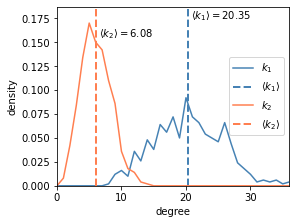

In [5]:
round_decimals = 2
font_size = None
fig = plt.figure(figsize=(4, 3), constrained_layout=True)
ax = plt.subplot()

x_max = len(k_pdf) if len(k_pdf) > len(k_delta_pdf) else len(k_delta_pdf)
x_axis = list(range(x_max))
xlim_max = len(x_axis) - 1
# xlim_max = 700
ax.set_xlim(0, xlim_max)

k_pdf_max = np.max(k_pdf)
k_delta_pdf_max = np.max(k_delta_pdf)
y_max = k_pdf_max if k_pdf_max > k_delta_pdf_max else k_delta_pdf_max
y_max = y_max * 1.1 if y_max * 1.1 < 1 else 1
ax.set_ylim(0, y_max)
ax.set_xlabel('degree', size=font_size)
ax.set_ylabel('density', size=font_size)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_title(sc_name.replace("_", " "))

# ax.plot(x_axis, rpad_with_zeros(k_pdf, len(x_axis)), color='steelblue', label=r'$k$')
# ax.axvline(x=k_avg, color='steelblue', linestyle='--', linewidth='2', label=r'$\langle k \rangle$')
ax.plot(x_axis, rpad_with_zeros(k_pdf, len(x_axis)), color='steelblue', label=r'$k_1$')
ax.axvline(x=k_avg, color='steelblue', linestyle='--', linewidth='2', label=r'$\langle k_1 \rangle$')
ax.text(x=k_avg + xlim_max*.01, y=y_max*.95, s=r'$\langle k_1 \rangle = $' + str(round(k_avg, round_decimals)), verticalalignment='center', size=font_size)

# ax.plot(x_axis, rpad_with_zeros(k_delta_pdf, len(x_axis)), color='coral', label=r'$k_{\Delta}$')
# ax.axvline(x=k_delta_avg, color='coral', linestyle='--', linewidth='2', label=r'$\langle k_{\Delta} \rangle $')
ax.plot(x_axis, rpad_with_zeros(k_delta_pdf, len(x_axis)), color='coral', label=r'$k_2$')
ax.axvline(x=k_delta_avg, color='coral', linestyle='--', linewidth='2', label=r'$\langle k_2 \rangle $')
ax.text(x=k_delta_avg + xlim_max*.01, y=y_max*.85, s=r'$\langle k_2 \rangle = $' + str(round(k_delta_avg, round_decimals)), verticalalignment='center', size=font_size)

ax.legend(fontsize=font_size, loc='center right')

fig.savefig(os.path.join(sc_degrees_figures_dir, f'{sc_type}_{sc_name}.pdf'), bbox_inches = 'tight')
fig.savefig(os.path.join(sc_degrees_figures_dir, f'{sc_type}_{sc_name}.png'))

In [6]:
df = pd.DataFrame(rpad_with_zeros(k_pdf, len(x_axis)))
df = df.assign(k2=rpad_with_zeros(k_delta_pdf, len(x_axis)))
df.columns = [ r'$k_1$', r'$k_2$' ]

vlines = []

k_formatted = f'{k_avg:.2f}'.rstrip('0').rstrip(
            '.') if '.' in f'{k_avg:.2f}' else f'{k_avg:.2f}'
k_delta_formatted = f'{k_delta_avg:.2f}'.rstrip('0').rstrip(
            '.') if '.' in f'{k_delta_avg:.2f}' else f'{k_delta_avg:.2f}'

vlines.append([k_avg, r'$\langle k_1 \rangle \approx ' + k_formatted + '$'])
vlines.append([k_delta_avg, r'$\langle k_2 \rangle \approx ' + k_delta_formatted + '$'])

fig = plot(df, figname=f'{sc_name}_k1_k2_loglog', logx=True, logy=True, vlines=vlines, subdirectory='degrees', figsize=(4,3))
fig = plot(df, figname=f'{sc_name}_k1_k2', logx=False, logy=False, vlines=vlines, subdirectory='degrees', figsize=(4,3))
